In [98]:
import pandas as pd

data = pd.read_csv('data/forestfires.csv')

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [99]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [101]:
from collections import Counter

Counter(data.month)

Counter({'mar': 54,
         'oct': 15,
         'aug': 184,
         'sep': 172,
         'apr': 9,
         'jun': 17,
         'jul': 32,
         'feb': 20,
         'jan': 2,
         'dec': 9,
         'may': 2,
         'nov': 1})

In [102]:
Counter(data.day)

Counter({'fri': 85,
         'tue': 64,
         'sat': 84,
         'sun': 95,
         'mon': 74,
         'wed': 54,
         'thu': 61})

In [103]:
import datetime

month_encoder = dict([(datetime.datetime(2019, i, 1).strftime('%b').lower(), i) for i in range(1, 13)])


day_of_week_encoder = {'fri': 5,
         'tue': 2,
         'sat': 6,
         'sun': 0,
         'mon': 1,
         'wed': 3,
         'thu': 4}

label_encoder = {
    'month': month_encoder,
    'day': day_of_week_encoder
}

In [104]:
data.replace(label_encoder, inplace=True)

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null int64
day      517 non-null int64
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [106]:
data.area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [107]:
import numpy as np

data['area_log'] = data.area.apply(lambda x: np.log(x+1))

In [108]:
data.area_log.describe()

count    517.000000
mean       1.111026
std        1.398436
min        0.000000
25%        0.000000
50%        0.418710
75%        2.024193
max        6.995620
Name: area_log, dtype: float64

In [109]:
data.area_log.apply(lambda x: np.exp(x) - 1).head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area_log, dtype: float64

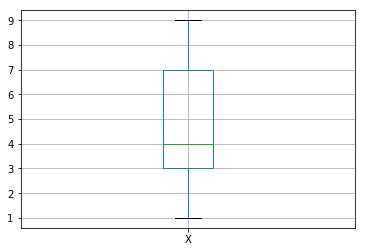

In [110]:
data[['X']].boxplot()

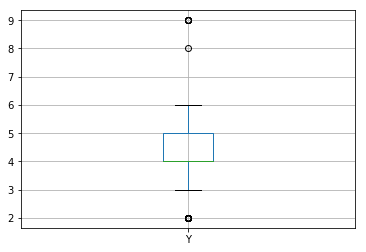

In [111]:
data[['Y']].boxplot()

In [112]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'area_log'],
      dtype='object')

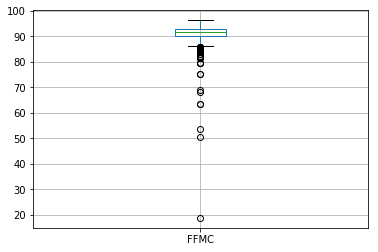

In [113]:
data[['FFMC']].boxplot()

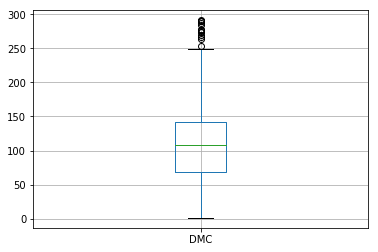

In [114]:
data[['DMC']].boxplot()

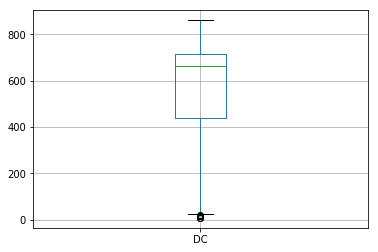

In [115]:
data[['DC']].boxplot()

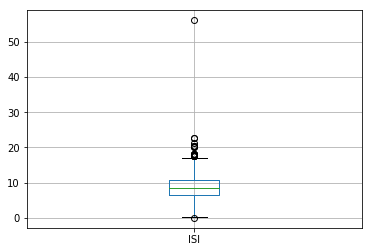

In [116]:
data[['ISI']].boxplot()

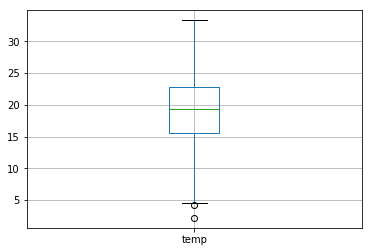

In [117]:
data[['temp']].boxplot()

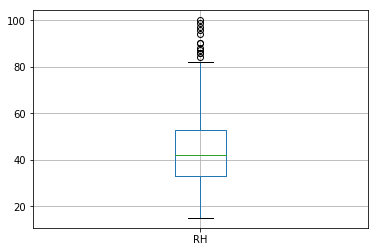

In [118]:
data[['RH']].boxplot()

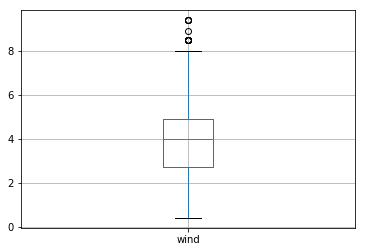

In [119]:
data[['wind']].boxplot()

In [132]:
import scipy.stats as stats
z = stats.zscore(data['wind'])

(z < -3).sum()

0

In [ ]:
(z > 3).sum()

In [138]:
Q1 = data['wind'].quantile(.25)

In [136]:
Q3 = data['wind'].quantile(.75)

In [ ]:
IQR = Q3 - Q1

In [141]:
data.loc[ ( data['wind'] < (Q1 - 1.5 * IQR) ) | (data['wind'] > (Q3 + 1.5 * IQR) ) ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,area_log
142,8,6,8,5,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,0.476234
162,6,3,3,6,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0,1.94,1.078410
168,6,5,3,5,91.2,48.3,97.8,12.5,14.6,26,9.4,0.0,2.53,1.261298
273,4,6,12,0,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98,2.300583
276,4,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85,2.936513
277,3,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,2.462150
278,4,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,3.136798
279,4,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,2.376764
281,6,5,12,2,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,3.249211
411,7,4,2,5,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62,1.726332


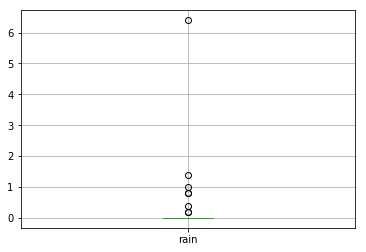

In [120]:
data[['rain']].boxplot()

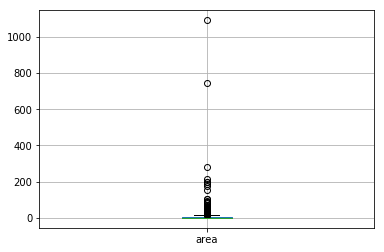

In [121]:
data[['area']].boxplot()

In [122]:
X = data.iloc[:,:-2]
y = data.area_log

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)



In [124]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

rmse(y_test, y_predict)

1.5137642363077688

In [125]:
sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1])

[('rain', 0.000989898836338534),
 ('month', 0.02876901575169043),
 ('day', 0.04572998706334373),
 ('Y', 0.0697944742490972),
 ('ISI', 0.07693792756526255),
 ('FFMC', 0.08920584073191995),
 ('X', 0.09019062120129757),
 ('DC', 0.09743284896843106),
 ('wind', 0.09858679650992759),
 ('DMC', 0.11475572483161936),
 ('RH', 0.1311526639815198),
 ('temp', 0.1564542003095522)]